<a href="https://colab.research.google.com/github/men-ka/data-science-111/blob/main/day9_categorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [2]:
# Load data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
df = pd.read_csv(url)

In [3]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.head())


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842 

In [10]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Name: 891 unique values
Sex: 2 unique values
Ticket: 681 unique values
Cabin: 147 unique values
Embarked: 3 unique values


In [13]:
print(df['Embarked'].value_counts(normalize=True))
print(df['Pclass'].value_counts())

Embarked
S    0.725028
C    0.188552
Q    0.086420
Name: proportion, dtype: float64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


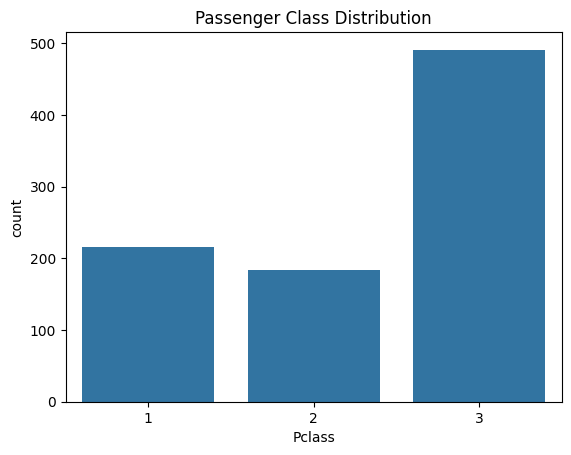

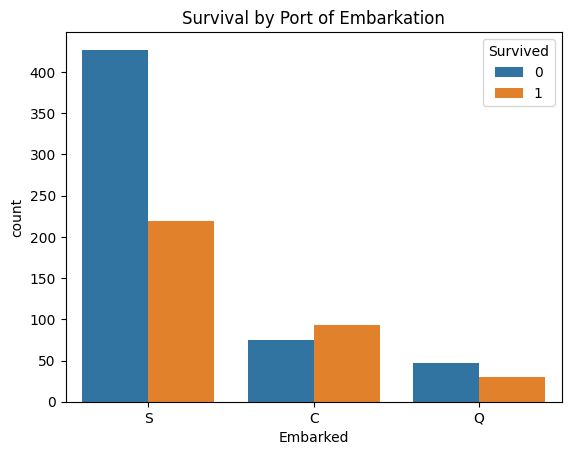

In [16]:
sns.countplot(data=df, x='Pclass')
plt.title("Passenger Class Distribution")
plt.show()

sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title("Survival by Port of Embarkation")
plt.show()


In [19]:
print(df.groupby('Sex')['Survived'].mean())
print(df.groupby('Embarked')['Survived'].mean())
print(df.groupby('Pclass')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Survival Rate according to differenet categories

Sex:

Female survival rate: 74.2%

Male survival rate: 18.9%

Major difference, suggesting women were prioritized during evacuation.

Embarked Port:

C (Cherbourg): 55.3%

Q (Queenstown): 38.9%

S (Southampton): 33.9%

Passengers from Cherbourg had the highest chance of survival.

Passenger Class (Pclass):

1st Class: 62.9%

2nd Class: 47.3%

3rd Class: 24.2%

The higher the class, the better the survival odds — clear class disparity.